# **Importing all Important Libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte



* **CLASS LABELS**
*  **0 = T-shirt/top** 
*  **1 = Trouser**
*  **2 = Pullover**
*  **3 = Dress**
*  **4 = Coat**
*  **5 = Sandal** 
*  **6 = Shirt**
*  **7 = Sneaker** 
*  **8 = Bag** 
* **9 = Ankle boot**

In [2]:

class_labels= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneakers','Bag','Ankle boot']

 



# Reading Data

In [3]:
train=pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")
test=pd.read_csv("../input/fashionmnist/fashion-mnist_test.csv")

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y_test=test['label']

In [7]:
train.shape , test.shape

((60000, 785), (10000, 785))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

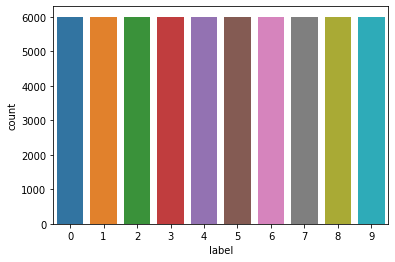

In [8]:
sns.countplot(train['label'])

 Checking Null Values

<AxesSubplot:>

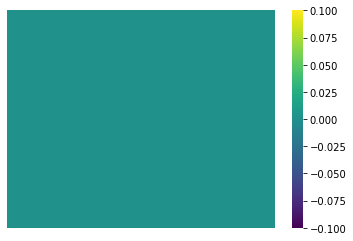

In [9]:
sns.heatmap(train.isnull(),xticklabels=False,yticklabels=False,cmap='viridis')

# Data Vizualisation

In [10]:
x= train.drop('label',axis=1).to_numpy()
y=train['label']

x=x/255

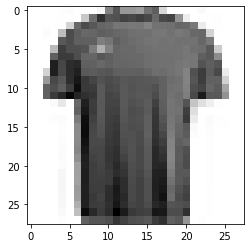

In [11]:
plt.imshow(x[600].reshape(28,28),cmap=matplotlib.cm.binary)
plt.show()

In [12]:
y[600]

0

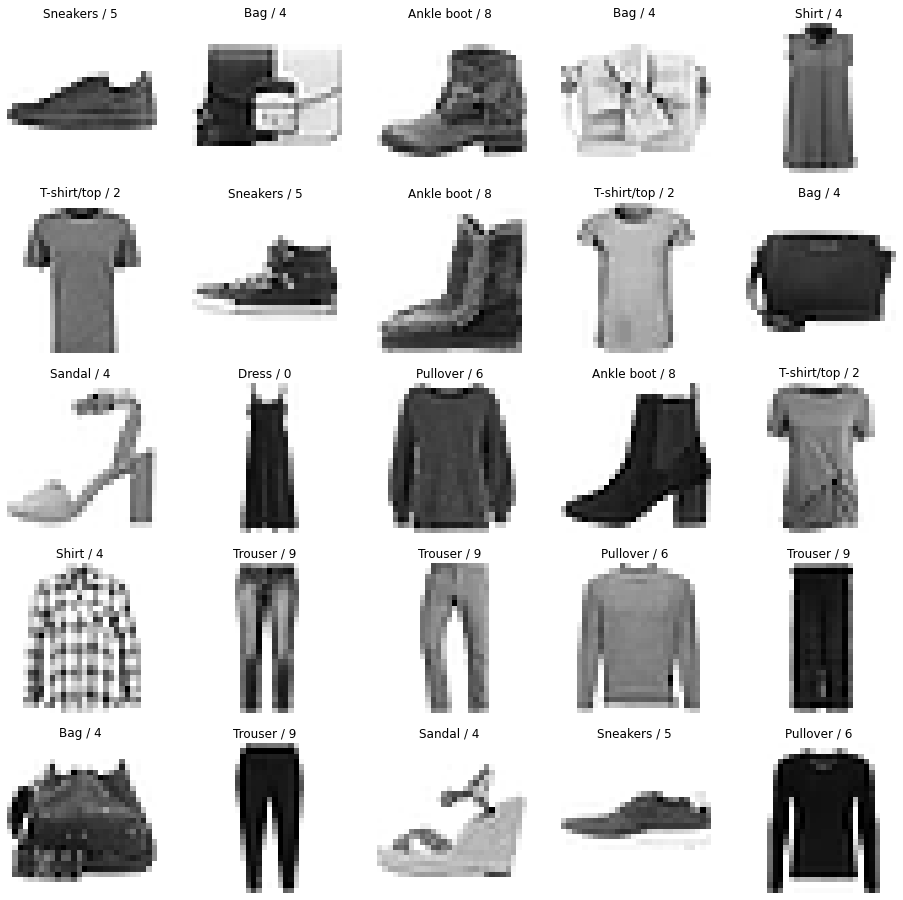

In [13]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j)
    j+=1
    image=plt.imshow(x[i].reshape(28,28),cmap=matplotlib.cm.binary)
    original=y[i]
    plt.axis('off')
    plt.title('{} / {} '.format(class_labels[y[i]],y[y[i]]))

# Building Artificial Neural Network

In [14]:
from keras.models import Sequential 
from keras.layers import Flatten,Dense

In [15]:
train_X=train.drop('label',axis=1)
train_Y=train['label']

In [16]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(train_X,train_Y,test_size=0.30,random_state=42)

In [17]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=60,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_x,train_y,batch_size=100,epochs=60)

Epoch 1/60
420/420 [==============================] - 1s 2ms/step - loss: 13.3518 - accuracy: 0.5685
Epoch 2/60
420/420 [==============================] - 1s 2ms/step - loss: 0.9119 - accuracy: 0.7015
Epoch 3/60
420/420 [==============================] - 1s 2ms/step - loss: 0.7552 - accuracy: 0.7386
Epoch 4/60
420/420 [==============================] - 1s 2ms/step - loss: 0.6786 - accuracy: 0.7596
Epoch 5/60
420/420 [==============================] - 1s 2ms/step - loss: 0.6120 - accuracy: 0.7840
Epoch 6/60
420/420 [==============================] - 1s 2ms/step - loss: 0.5708 - accuracy: 0.7980
Epoch 7/60
420/420 [==============================] - 1s 2ms/step - loss: 0.5411 - accuracy: 0.8096
Epoch 8/60
420/420 [==============================] - 1s 2ms/step - loss: 0.5487 - accuracy: 0.8088
Epoch 9/60
420/420 [==============================] - 1s 2ms/step - loss: 0.5151 - accuracy: 0.8185
Epoch 10/60
420/420 [==============================] - 1s 2ms/step - loss: 0.5213 - accuracy: 0.818

# Evaluation And Prediction

In [18]:
model.evaluate(test_x,test_y)

563/563 [==============================] - 1s 1ms/step - loss: 0.4580 - accuracy: 0.8579


[0.45803314447402954, 0.8578888773918152]

In [19]:
test = pd.read_csv("../input/fashionmnist/fashion-mnist_test.csv")
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
test=test.drop('label',axis=1).to_numpy()

In [21]:
prediction=model.predict(test)
prediction 


array([[8.2662696e-01, 3.4383791e-07, 2.5560104e-03, ..., 2.9653502e-23,
        3.1950279e-07, 3.0233305e-22],
       [1.6626622e-13, 1.0000000e+00, 4.3860338e-20, ..., 0.0000000e+00,
        4.2711447e-14, 0.0000000e+00],
       [7.6658860e-02, 6.6910181e-03, 6.2352759e-01, ..., 6.4802018e-04,
        2.2100247e-02, 2.1928493e-03],
       ...,
       [1.2251798e-21, 1.4992030e-38, 1.2898776e-37, ..., 0.0000000e+00,
        1.0000000e+00, 3.2754834e-24],
       [8.1462063e-02, 1.5632062e-04, 7.6999664e-02, ..., 8.9505523e-09,
        5.4493811e-02, 4.0623117e-06],
       [1.3712225e-03, 9.8161626e-01, 2.4998159e-05, ..., 4.1692517e-18,
        5.7756832e-05, 5.2997243e-17]], dtype=float32)

In [22]:
Y_test.to_frame()

,label
0,0
1,1
2,2
3,2
4,3
...,...
9995,0
9996,6
9997,8
9998,8


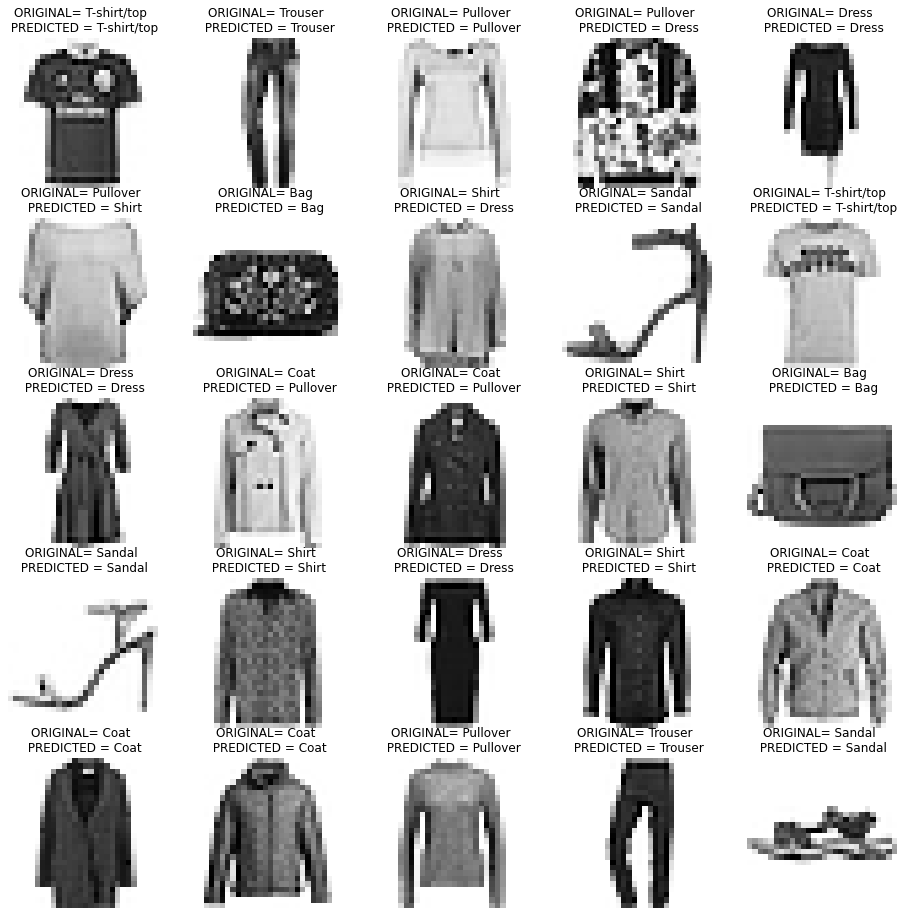

In [23]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(test[i].reshape(28,28),cmap="Greys")
  plt.axis('off')
  plt.title("ORIGINAL= {} \n PREDICTED = {}".format(class_labels[Y_test[i]], class_labels[np.argmax(prediction[i])]))